# Signals and Sequences

# HIDDEN
## Prerequisites

In [1]:
# HIDDEN
# ! pip install -U sympy 
# ! pip install -U numpy
# ! pip install -U matplotlib

# ! sudo apt install -y cm-super
# ! sudo apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng

In [2]:
# HIDDEN
from IPython.display import HTML
HTML('''<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>.''')

# HIDDEN
## Simulation and Visualization in Python

In [3]:
# HIDE/SHOW
import warnings
warnings.filterwarnings('ignore')

import sympy as sp
import numpy as np

from sympy.abc import t, x, y
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.rcParams['text.usetex'] = True
%matplotlib inline 

# HIDDEN
## Utilizations

In [4]:
# HIDE/SHOW            
def mpl_axes_plot(axes, expr, xrange, zero_is_none=False, **kwargs):
    x, start, stop = xrange
    func = sp.lambdify(x, expr)
    x = np.linspace(start, stop, 10000)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    if zero_is_none:
        y[y==0] = np.nan
    axes.plot(x, y, **kwargs)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    return axes
    
def mpl_axes_stem(axes, expr, xrange, zero_is_none=False, **kwargs):
    x, start, stop, step = xrange
    func = sp.lambdify(x, expr, ['numpy', 'sympy'])
    x = np.arange(start, stop, step)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    if zero_is_none:
        y[y==0] = np.nan
    axes.stem(x, y, basefmt=" ", use_line_collection=True, **kwargs)
    return axes
    
def mpl_axes_step(axes, expr, xrange, **kwargs):
    x, start, stop, step = xrange
    func = sp.lambdify(x, expr)
    x = np.arange(start, stop, step)
    y = func(x)
    axes.tick_params(axis='x', labelsize=8)
    axes.tick_params(axis='y', labelsize=8)
    axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    axes.yaxis.set_major_locator(MaxNLocator(integer=True))
    axes.grid(False)
    axes.margins(0.02, 0.02)
    axes.plot(x, np.zeros_like(x), color='k', alpha=0.5)
    return axes.step(x, y, **kwargs)

## What are Signals?

- Signals convey information. 
- Signals are represented as mathematical functions of one or more independent variables. 
- Signals are represented as mathematical functions of one dimensional variable in time.



## Types of Signals
- Continuous-time (CT) Signals			
- Discrete-time (DT) Signals
- Quantized Signals 
- Digital Signals?

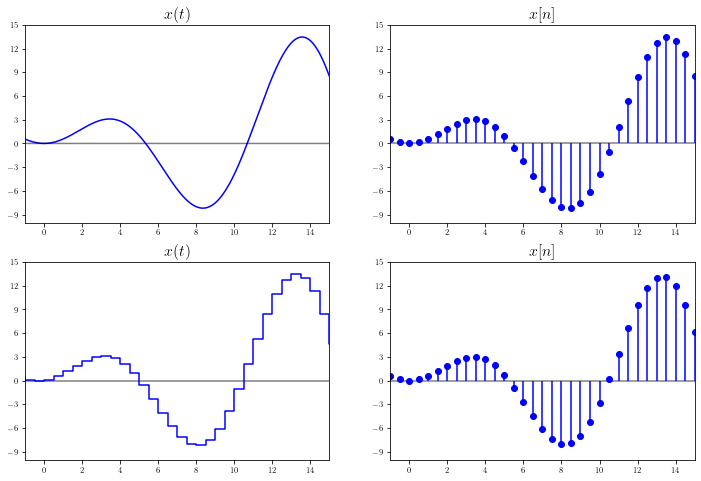

In [5]:
# HIDE/SHOW
h = t*sp.sin(t/1.7)
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)
    
mpl_axes_plot(ax[0][0], 
    expr=h, 
    xrange=(t, -60, 60), 
    color='b')
ax[0][0].set_xlim(-1, 15, 1)
ax[0][0].set_ylim(-10, 15, 1)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], 
    expr=h, 
    xrange=(t, -60, 60, 0.5), 
    linefmt='b', 
    markerfmt='bo')
ax[0][1].set_xlim(-1, 15, 1)
ax[0][1].set_ylim(-10, 15, 1)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_step(ax[1][0], 
    expr=h, 
    xrange=(t, -60, 60, 0.5), 
    color='b',
)
ax[1][0].set_xlim(-1, 15, 1)
ax[1][0].set_ylim(-10, 15, 1)
ax[1][0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[1][1], 
    expr=h.xreplace({n : round(n, 1) for n in h.atoms(sp.Number)}),
    xrange=(t, -60, 60, 0.5), 
    linefmt='b', 
    markerfmt='bo')
ax[1][1].set_xlim(-1, 15, 1)
ax[1][1].set_ylim(-10, 15, 1)
ax[1][1].set_title(r'$x[n]$', fontsize=16)


plt.show()

## Classes of Signals

### Even and Odd Signals

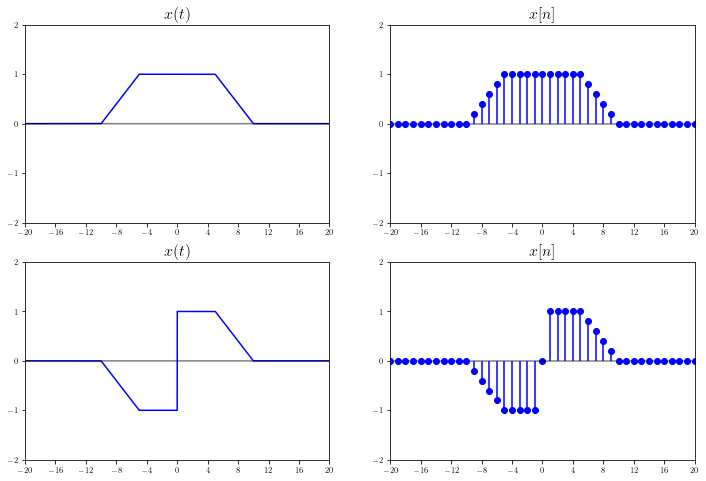

In [6]:
# HIDE/SHOW
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

f = sp.Piecewise(
    (0, t<0),
    (0.5, t==0),
    (1, (t>0)&(t<=1)),           
    (2-t, (t>=1)&(t<=2)), 
    (0, t>=2)
)
h = f.subs(t, t/5)
mpl_axes_plot(ax[0][0], (h+h.subs(t, -t)), (t, -40, 40), color='b')
# mpl_axes_plot(ax[0][0], (h+h.subs(t, -t)), (t, -40, 40), color='r')
ax[0][0].set_xlim(-20, 20, 1)
ax[0][0].set_ylim(-2., 2., 1)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], (h+h.subs(t, -t)), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
# mpl_axes_stem(ax[0][1], (h+h.subs(t, -t)), (t, -40, 40, 1), linefmt='r', markerfmt='ro')
ax[0][1].stem(0, 1, basefmt=" ", linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 1)
ax[0][1].set_ylim(-2., 2., 1)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

mpl_axes_plot(ax[1][0], (h-h.subs(t, -t)), (t, -40, 40), color='b')
# mpl_axes_plot(ax[1][0], (h-h.subs(t, -t)), (t, -40, 40), color='r')
ax[1][0].set_xlim(-20, 20, 1)
ax[1][0].set_ylim(-2., 2., 1)
ax[1][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[1][1], (h-h.subs(t, -t)), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
# mpl_axes_stem(ax[1][1], (h-h.subs(t, -t)), (t, -40, 40, 1), linefmt='r', markerfmt='ro')
ax[1][1].scatter(0, 0, color='b')
ax[1][1].set_xlim(-20, 20, 1)
ax[1][1].set_ylim(-2., 2., 1)
ax[1][1].set_title(r'$x[n]$', fontsize=16)

plt.show()

### Nonperiodic and Periodic Signals

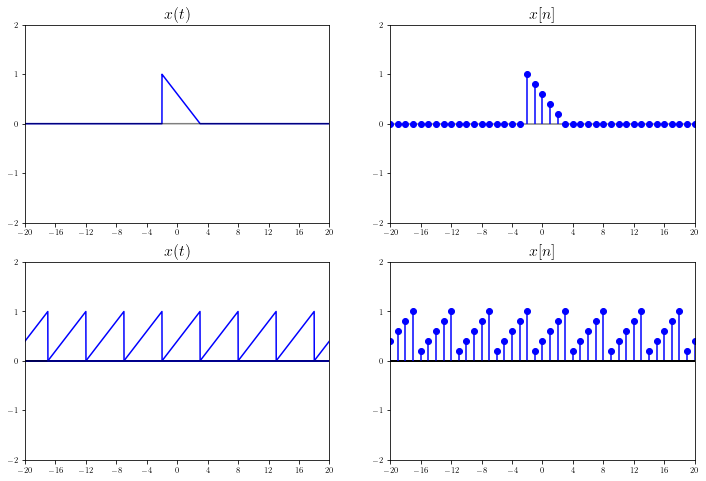

In [7]:
# HIDE/SHOW
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)


n = sp.Piecewise(
    (0, t<0),
    (0, t>5),
    (1-t/5, (0<=t)&(t<=5)),  
).subs(t, t+2)

p = sp.Piecewise(
    (0, t<0),
    (0, t>=5),
    (1-t/5, (0<=t)&(t<=5)),  
).subs(t, t+3)

mpl_axes_plot(ax[0][0], n, (t, -40, 40), color='b')
ax[0][0].set_xlim(-20, 20, 1)
ax[0][0].set_ylim(-2., 2., 1)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], n, (t, -40, 40, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 1)
ax[0][1].set_ylim(-2., 2., 1)
ax[0][1].set_title(r'$x[n]$', fontsize=16)

for k in range(-5, 5):
    mpl_axes_plot(ax[1][0], p.subs(t, -t).subs(t, t+k*5), (t, -40, 40), zero_is_none=False, color='b')
ax[1][0].set_xlim(-20, 20, 1)
ax[1][0].set_ylim(-2., 2., 1)
ax[1][0].set_title(r'$x(t)$', fontsize=16)

for k in range(-5, 5):
    mpl_axes_stem(ax[1][1], p.subs(t, -t).subs(t, t+k*5), (t, -40, 40, 1), zero_is_none=True, linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 1)
ax[1][1].set_ylim(-2., 2., 1)
ax[1][1].set_title(r'$x[n]$', fontsize=16)

plt.show()

### Sinusoidal Signals

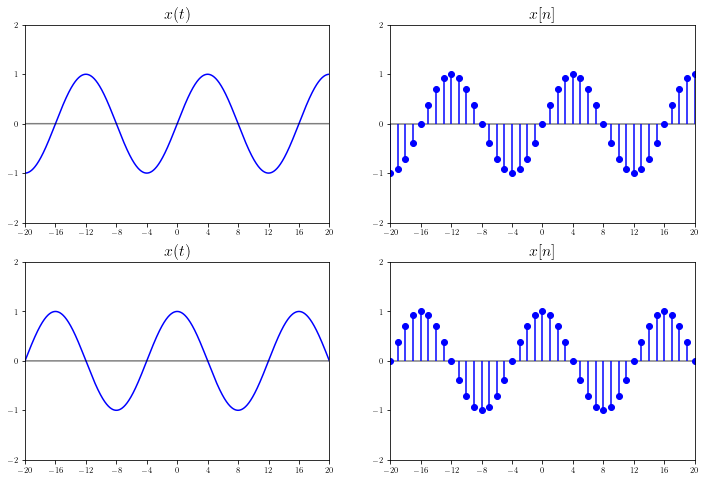

In [8]:
# HIDE/SHOW
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

mpl_axes_plot(ax[0][0], sp.sin(t*(sp.pi/8)), (t, -40, 40), color='b')
ax[0][0].set_xlim(-20, 20, 1)
ax[0][0].set_ylim(-2, 2, 1)
ax[0][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[0][1], sp.sin(t*(sp.pi/8)), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-20, 20, 1)
ax[0][1].set_ylim(-2, 2, 1)
ax[0][1].set_title(r'$x[n]$', fontsize=16)


mpl_axes_plot(ax[1][0], sp.cos(t*(sp.pi/8)), (t, -40, 40), color='b')
ax[1][0].set_xlim(-20, 20, 1)
ax[1][0].set_ylim(-2, 2, 1)
ax[1][0].set_title(r'$x(t)$', fontsize=16)


mpl_axes_stem(ax[1][1], sp.cos(t*(sp.pi/8)), (t, -40, 40, 1), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-20, 20, 1)
ax[1][1].set_ylim(-2, 2, 1)
ax[1][1].set_title(r'$x[n]$', fontsize=16)

plt.show()

### Real Exponential Signals

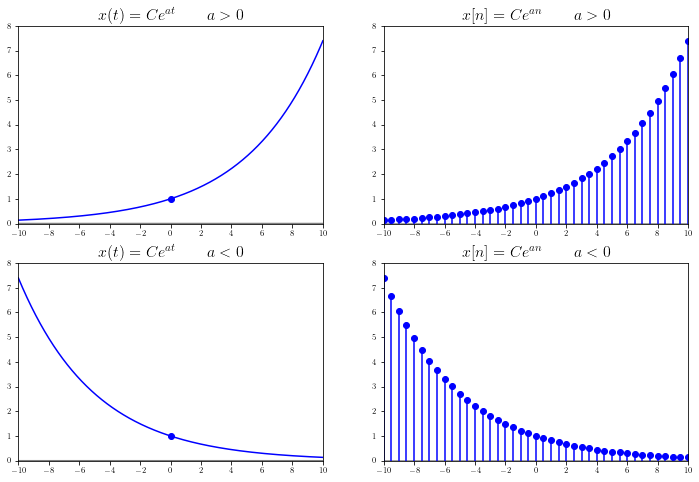

In [9]:
# HIDE/SHOW
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

mpl_axes_plot(ax[0][0], sp.exp((t)/5), (t, -40, 40), color='b')
ax[0][0].scatter(0, 1, color='b')
ax[0][0].set_xlim(-10, 10, 1)
ax[0][0].set_ylim(0, 8, 1)
ax[0][0].set_title(r'$x(t) = Ce^{at}  \qquad  a>0$', fontsize=16)


mpl_axes_stem(ax[0][1], sp.exp((t)/5), (t, -40, 40, 0.5), linefmt='b', markerfmt='bo')
ax[0][1].set_xlim(-10, 10, 1)
ax[0][1].set_ylim(0, 8, 1)
ax[0][1].set_title(r'$x[n] = Ce^{an}  \qquad  a>0$', fontsize=16)


mpl_axes_plot(ax[1][0], sp.exp((-t)/5), (t, -40, 40), color='b')
ax[1][0].scatter(0, 1, color='b')
ax[1][0].set_xlim(-10, 10, 1)
ax[1][0].set_ylim(0, 8, 1)
ax[1][0].set_title(r'$x(t) = Ce^{at}  \qquad  a<0$', fontsize=16)


mpl_axes_stem(ax[1][1], sp.exp((-t)/5), (t, -40, 40, 0.5), linefmt='b', markerfmt='bo')
ax[1][1].set_xlim(-10, 10, 1)
ax[1][1].set_ylim(0, 8, 1)
ax[1][1].set_title(r'$x[n] = Ce^{an}  \qquad  a<0$', fontsize=16)

plt.show()

### Complex Exponential Signals

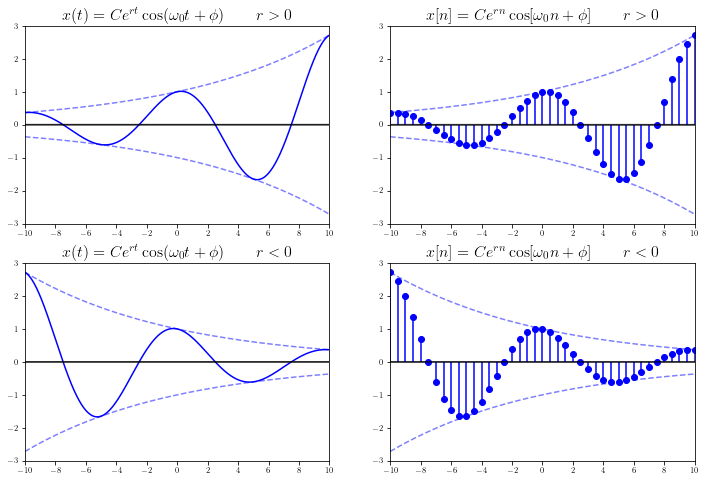

In [10]:
# HIDE/SHOW
fig, ax = plt.subplots(
    2, 2, 
    figsize=(12, 8), 
    # tight_layout=True,
)

mpl_axes_plot(ax[0][0], sp.exp((t)/10)*sp.cos(2*np.pi*t/10), (t, -40, 40), color='b')
mpl_axes_plot(ax[0][0], sp.exp((t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
mpl_axes_plot(ax[0][0], -sp.exp((t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
ax[0][0].set_xlim(-10, 10, 1)
ax[0][0].set_ylim(-3, 3, 1)
ax[0][0].set_title(r'$x(t) = Ce^{rt}\cos(\omega_0t+\phi) \qquad r>0$', fontsize=16)


mpl_axes_stem(ax[0][1], sp.exp((t)/10)*sp.cos(2*np.pi*t/10), (t, -40, 40, 0.5), linefmt='b', markerfmt='bo')
mpl_axes_plot(ax[0][1], sp.exp((t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
mpl_axes_plot(ax[0][1], -sp.exp((t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
ax[0][1].set_xlim(-10, 10, 1)
ax[0][1].set_ylim(-3, 3, 1)
ax[0][1].set_title(r'$x[n] = Ce^{rn}\cos[\omega_0n+\phi] \qquad r>0$', fontsize=16)


mpl_axes_plot(ax[1][0], sp.exp((-t)/10)*sp.cos(2*np.pi*t/10), (t, -40, 40), color='b')
mpl_axes_plot(ax[1][0], sp.exp((-t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
mpl_axes_plot(ax[1][0], -sp.exp((-t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
ax[1][0].set_xlim(-10, 10, 1)
ax[1][0].set_ylim(-3, 3, 1)
ax[1][0].set_title(r'$x(t) = Ce^{rt}\cos(\omega_0t+\phi) \qquad r<0$', fontsize=16)


mpl_axes_stem(ax[1][1], sp.exp((-t)/10)*sp.cos(2*np.pi*t/10), (t, -40, 40, 0.5), linefmt='b', markerfmt='bo')
mpl_axes_plot(ax[1][1], sp.exp((-t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
mpl_axes_plot(ax[1][1], -sp.exp((-t)/10), (t, -40, 40), color='b', alpha=0.5, linestyle='--')
ax[1][1].set_xlim(-10, 10, 1)
ax[1][1].set_ylim(-3, 3, 1)
ax[1][1].set_title(r'$x[n] = Ce^{rn}\cos[\omega_0n+\phi] \qquad r<0$', fontsize=16)

plt.show()

## Elementary Signals

### Unit Ramp (ReLU) Functions

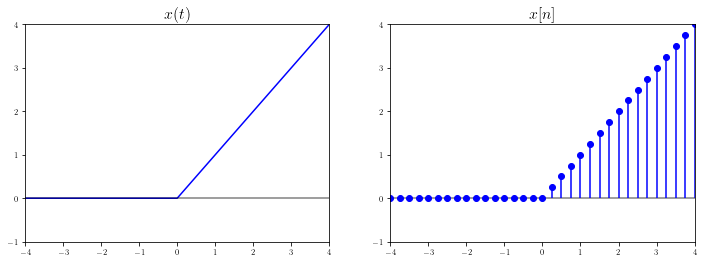

In [11]:
# HIDE/SHOW
fig, ax = plt.subplots(
    1, 2, 
    figsize=(12, 4), 
    # tight_layout=True,
)

mpl_axes_plot(ax[0], t*sp.Heaviside(t), (t, -40, 40), color='b')
ax[0].set_xlim(-4, 4, 1)
ax[0].set_ylim(-1, 4, 1)
ax[0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[1], t*sp.Heaviside(t), (t, -40, 40, 0.25), linefmt='b', markerfmt='bo')
ax[1].set_xlim(-4, 4, 1)
ax[1].set_ylim(-1, 4, 1)
ax[1].set_title(r'$x[n]$', fontsize=16)

plt.show()

### Unit Step (Heaviside) Functions

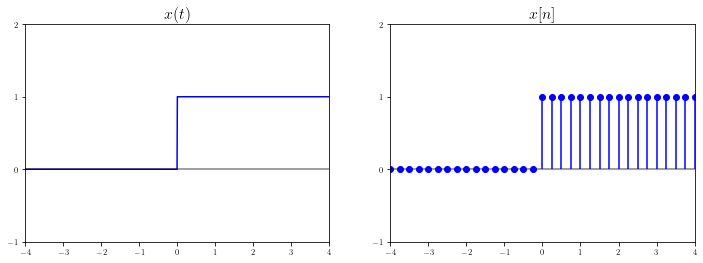

In [12]:
# HIDE/SHOW
fig, ax = plt.subplots(
    1, 2, 
    figsize=(12, 4), 
    # tight_layout=True,
)

mpl_axes_plot(ax[0], sp.Heaviside(t), (t, -40, 40), color='b')
ax[0].set_xlim(-4, 4, 1)
ax[0].set_ylim(-1, 2, 1)
ax[0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[1], sp.GreaterThan(t, 0), (t, -40, 40, 0.25), linefmt='b', markerfmt='bo')
ax[1].set_xlim(-4, 4, 1)
ax[1].set_ylim(-1, 2, 1)
ax[1].set_title(r'$x[n]$', fontsize=16)

plt.show()

### Unit Rectangle Functions

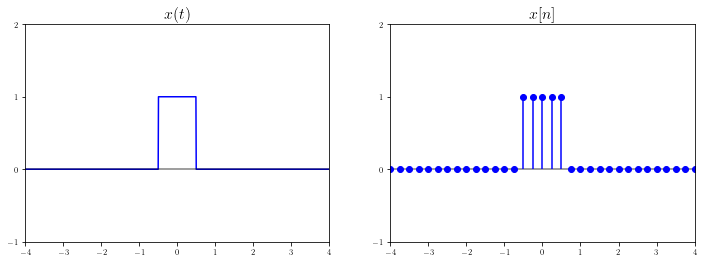

In [13]:
# HIDE/SHOW
fig, ax = plt.subplots(
    1, 2, 
    figsize=(12, 4), 
    # tight_layout=True,
)

rect = sp.Piecewise(
    (0, sp.Or(sp.StrictLessThan(t, -1/2), sp.StrictGreaterThan(t, 1/2))),
    (1, sp.And(sp.LessThan(t, 1/2), sp.GreaterThan(t, -1/2))),
)

mpl_axes_plot(ax[0], rect, (t, -40, 40), color='b')
ax[0].set_xlim(-4, 4, 1)
ax[0].set_ylim(-1, 2, 1)
ax[0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[1], rect, (t, -40, 40, 0.25), linefmt='b', markerfmt='bo')
ax[1].set_xlim(-4, 4, 1)
ax[1].set_ylim(-1, 2, 1)
ax[1].set_title(r'$x[n]$', fontsize=16)

plt.show()

### Unit Triangle Functions

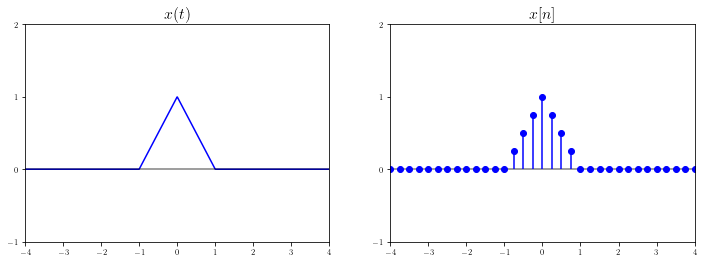

In [14]:
# HIDE/SHOW
fig, ax = plt.subplots(
    1, 2, 
    figsize=(12, 4), 
    # tight_layout=True,
)
tri = sp.Piecewise(
    (0, sp.Or(sp.StrictLessThan(t, -1), sp.StrictGreaterThan(t, 1))),
    (1+t, sp.And(sp.LessThan(t, 0), sp.GreaterThan(t, -1))),
    (1-t, sp.And(sp.LessThan(t, 1), sp.GreaterThan(t, 0))),  
)
mpl_axes_plot(ax[0], tri, (t, -40, 40), color='b')
ax[0].set_xlim(-4, 4, 1)
ax[0].set_ylim(-1, 2, 1)
ax[0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[1], tri, (t, -40, 40, 0.25), linefmt='b', markerfmt='bo')
ax[1].set_xlim(-4, 4, 1)
ax[1].set_ylim(-1, 2, 1)
ax[1].set_title(r'$x[n]$', fontsize=16)

plt.show()

### Unit Impulse (Delta) Functions

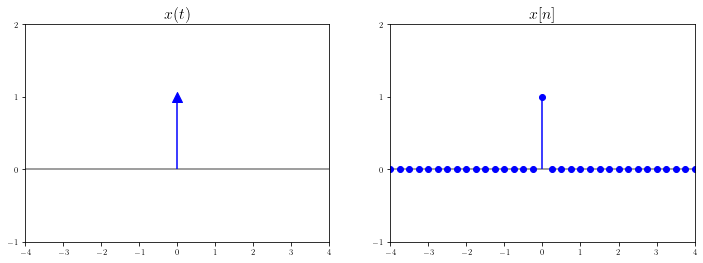

In [15]:
# HIDE/SHOW
fig, ax = plt.subplots(
    1, 2, 
    figsize=(12, 4), 
    # tight_layout=True,
)

delta = sp.Piecewise(
    (1, sp.Equality(t, 0)),
    (0, sp.Or(sp.StrictLessThan(t, 0), sp.StrictGreaterThan(t, 0))),
)

# mpl_axes_stem(ax[0], sp.Equality(t, 0), (t, 0, 1, 1), linefmt='b', markerfmt='b^')
# mpl_axes_plot(ax[0], sp.Equality(t, 0), (t, -40, 40), color='k', alpha=0.5)
mpl_axes_stem(ax[0], delta, (t, -40, 40, 0.25), linefmt='b', markerfmt=' ')
ax[0].scatter(0, 1, color='b', marker='^', s=100)
ax[0].set_xlim(-4, 4, 1)
ax[0].set_ylim(-1, 2, 1)
ax[0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[1], delta, (t, -40, 40, 0.25), linefmt='b', markerfmt='bo')
ax[1].set_xlim(-4, 4, 1)
ax[1].set_ylim(-1, 2, 1)
ax[1].set_title(r'$x[n]$', fontsize=16)

plt.show()

### Unit Sinc Functions

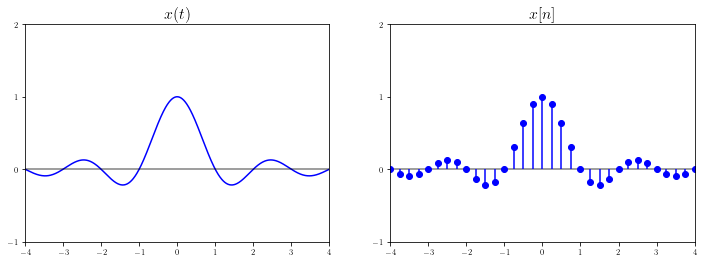

In [16]:
# HIDE/SHOW
fig, ax = plt.subplots(
    1, 2, 
    figsize=(12, 4), 
    # tight_layout=True,
)
sp.SingularityFunction(t, 0, 1)
mpl_axes_plot(ax[0], sp.sin(sp.pi*t)/(sp.pi*t+1e-6), (t, -40, 40), color='b')
ax[0].set_xlim(-4, 4, 1)
ax[0].set_ylim(-1, 2, 1)
ax[0].set_title(r'$x(t)$', fontsize=16)

mpl_axes_stem(ax[1], sp.sin(sp.pi*t)/(sp.pi*t), (t, -40, 40, 0.25), linefmt='b', markerfmt='bo')
mpl_axes_stem(ax[1], 1, (t, 0, 1, 1), linefmt='b', markerfmt='bo')
ax[1].set_xlim(-4, 4, 1)
ax[1].set_ylim(-1, 2, 1)
ax[1].set_title(r'$x[n]$', fontsize=16)

plt.show()